In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import joblib

In [29]:
df = pd.read_csv("employee_salary_dataset.csv")

le = LabelEncoder()
for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    df[col] = le.fit_transform(df[col])

joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [30]:
numerical_cols = ['age', 'educational-num', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = df.shape[0]
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    after = df.shape[0]
    print(f"Removed {before - after} outliers from '{col}'")


Removed 0 outliers from 'age'
Removed 0 outliers from 'educational-num'
Removed 0 outliers from 'fnlwgt'
Removed 0 outliers from 'capital-gain'
Removed 0 outliers from 'capital-loss'
Removed 0 outliers from 'hours-per-week'
Removed 0 outliers from 'salary'


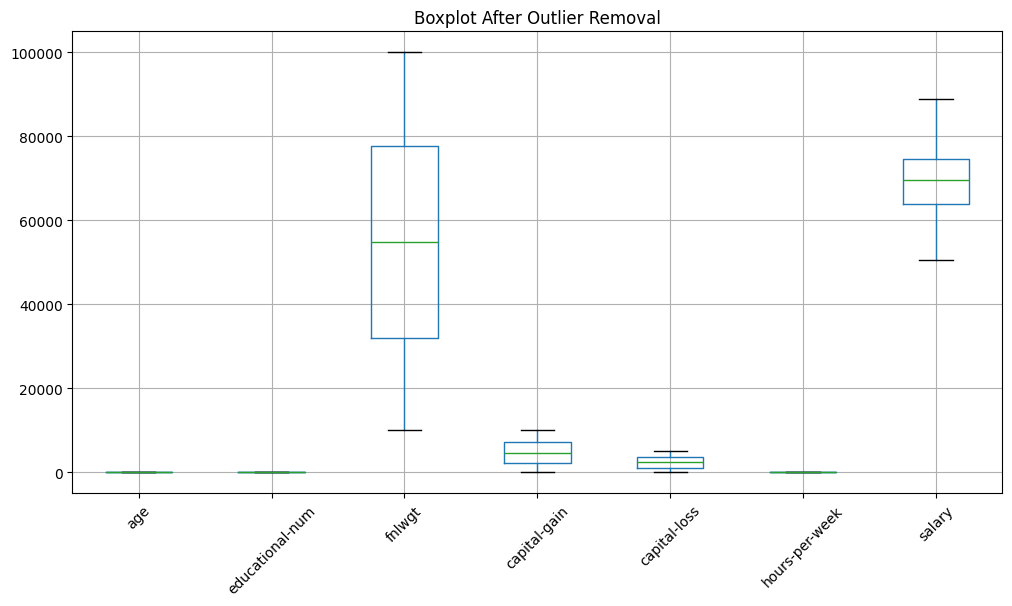

In [31]:
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot(rot=45)
plt.title("Boxplot After Outlier Removal")
plt.grid(True)
plt.show()


In [32]:
X = df.drop("salary", axis=1)
y = df["salary"]

scaler = StandardScaler()
X[["age", "educational-num", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week"]] = \
    scaler.fit_transform(X[["age", "educational-num", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week"]])

joblib.dump(scaler, 'scaler.pkl')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "RMSE": rmse, "R2 Score": r2})



               Model         RMSE  R2 Score
0  Linear Regression  2900.501385  0.864567
1      Decision Tree  4300.674717  0.702251
2      Random Forest  3106.545181  0.844642


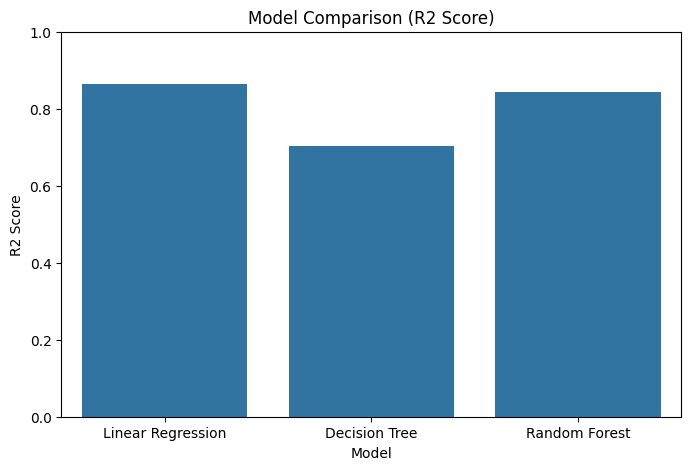

['model.pkl']

In [34]:
results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="R2 Score", data=results_df)
plt.title("Model Comparison (R2 Score)")
plt.ylim(0, 1)
plt.show()

best_model = LinearRegression()
best_model.fit(X, y)
joblib.dump(best_model, "model.pkl")
